I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.


Description of Variables
The dataset contains 6366 observations of 9 variables:
rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 =
strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semiskilled/
unskilled, 3 = "white collar", 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs
Code to loading data and modules:


In [223]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
import seaborn as sns

In [224]:
sns.set()

In [225]:
data =sm.datasets.fair.load_pandas().data


In [226]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [227]:
# add "affair" column: 1 represents having affairs, 0 represents not 
data['affair'] = (data.affairs >0).astype(int)

In [228]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [229]:
len(data.columns)

10

In [230]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [232]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

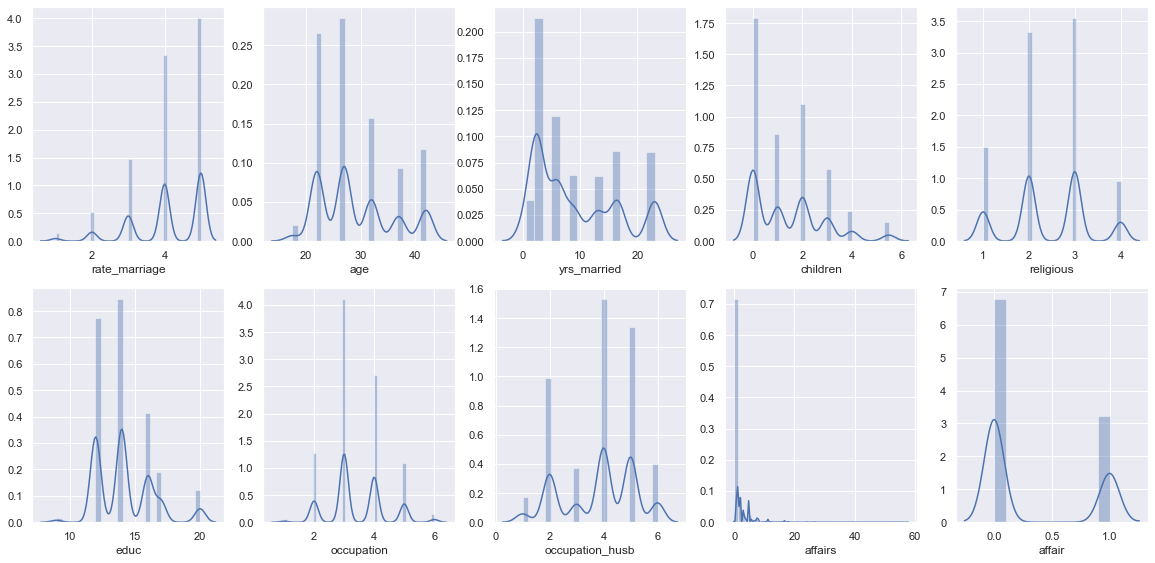

In [233]:
# check the distribution of data
plt.figure(figsize=(20,25), facecolor='white')
plotno = 1
for col in data.columns:
    if plotno < 18:
        plt.subplot(5,5,plotno)
        sns.distplot(data[col])
        plotno +=1

In [121]:
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [122]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [172]:
# # let check the relation b/w dependent variable and outcome
# plt.figure(figsize=(20,25), facecolor='white')
# plotno = 1
# for col in data.columns:
#     plt.subplot(5,5,plotno)
#     sns.scatterplot(data[col], y)
#     plotno += 1

Text(0, 0.5, 'count')

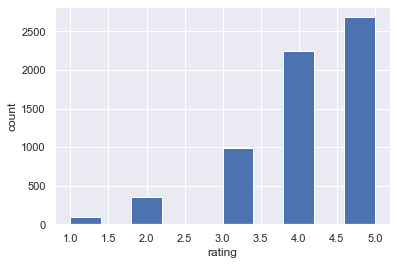

In [234]:
# lets check the histogaram of rate_marriage and eduction
plt.hist(data['rate_marriage'])
plt.xlabel('rating')
plt.ylabel('count')

Text(0, 0.5, 'count')

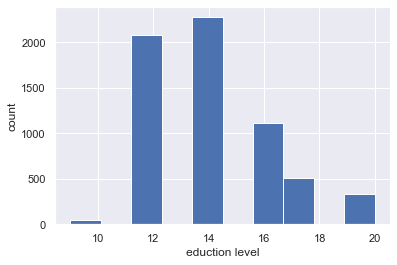

In [235]:
plt.hist(data['educ'])
plt.xlabel('eduction level')
plt.ylabel('count')

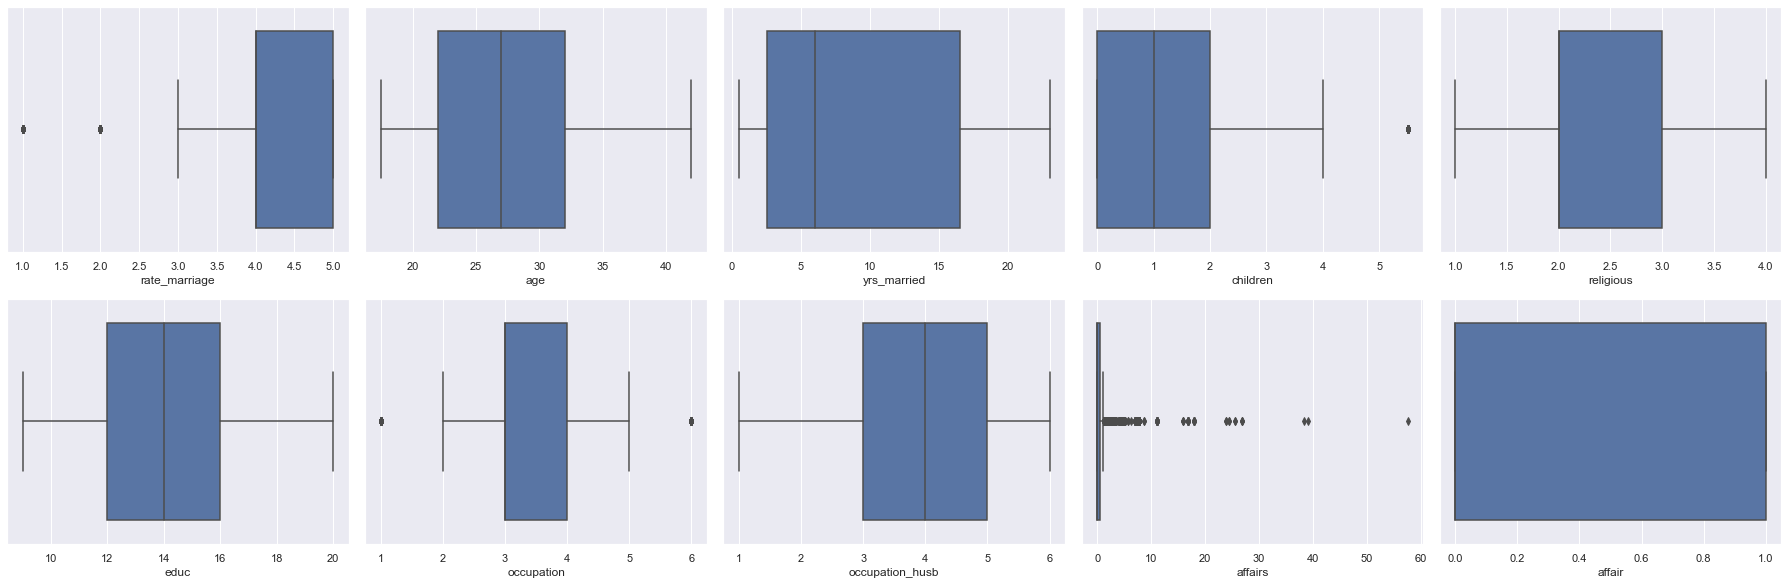

In [236]:
plt.figure(figsize=(25,20), facecolor='white')
plotno = 1
for col in data.columns:
    plt.subplot(5,5,plotno)
    sns.boxplot(data[col])
    plotno +=1
    plt.xlabel(col)
    plt.tight_layout()

As we can see there are some outlier in rate_marriage, children etc. 
lets remove the same

In [237]:
data = data[data['rate_marriage'] > data['rate_marriage'].quantile(0.05)]

In [238]:
data = data[data['children'] < data['children'].quantile(0.98)]

In [239]:
len(data)

5741

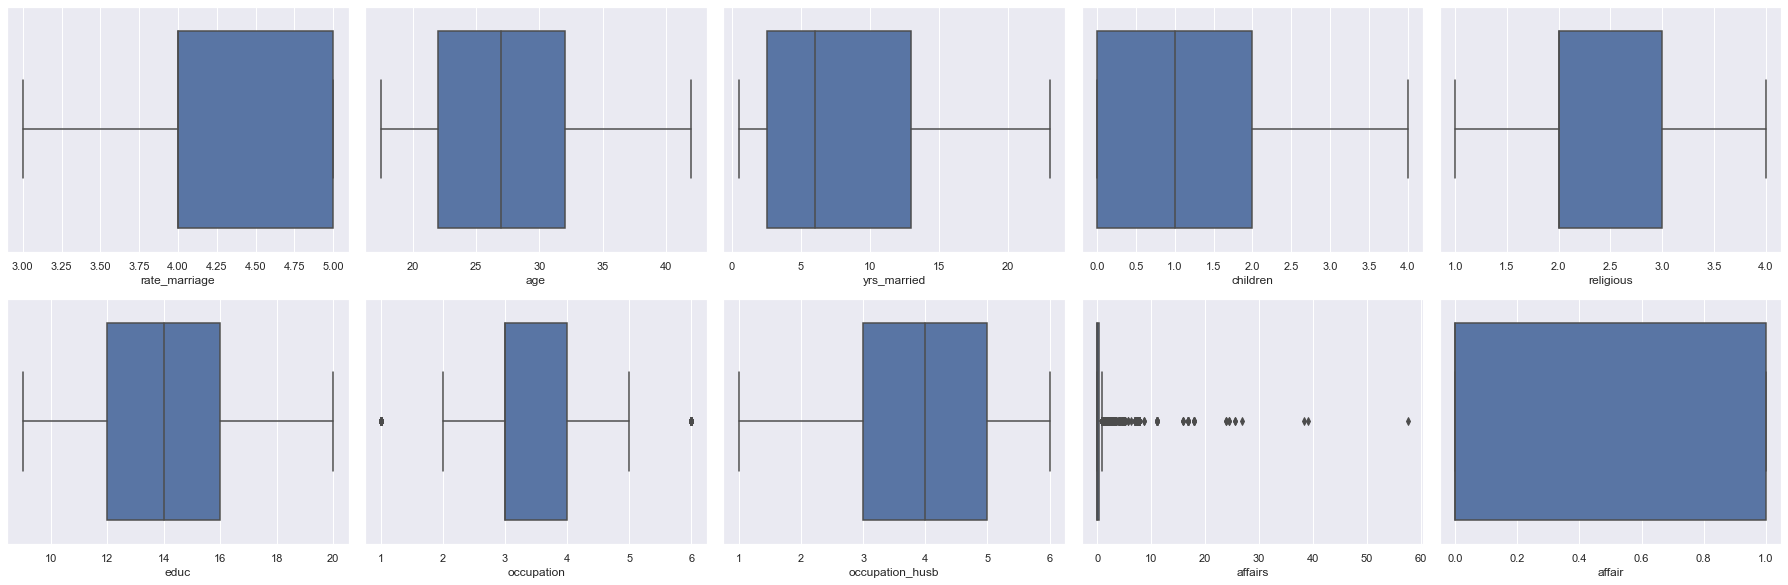

In [240]:
plt.figure(figsize=(25,20), facecolor='white')
plotno = 1
for col in data.columns:
    plt.subplot(5,5,plotno)
    sns.boxplot(data[col])
    plotno +=1
    plt.xlabel(col)
    plt.tight_layout()

Text(0.5, 1.0, 'marriage ratting vs affair')

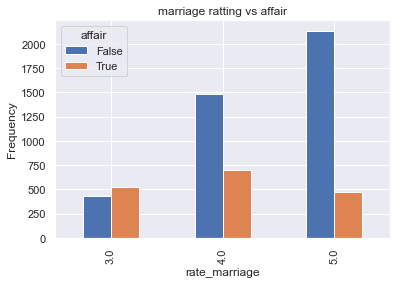

In [241]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(data['rate_marriage'], data['affair'].astype(bool)).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('marriage ratting vs affair')


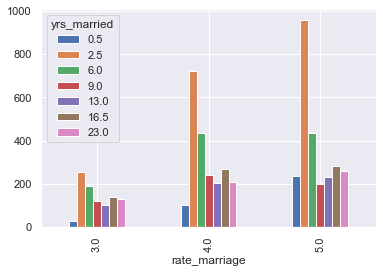

In [242]:
pd.crosstab(data['rate_marriage'], data['yrs_married']).plot(kind='bar')

Text(0, 0.5, 'Frequency')

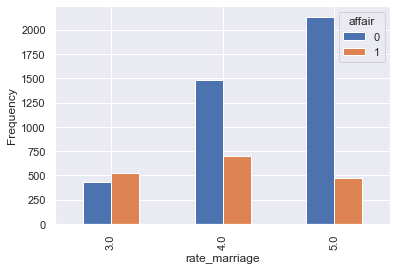

In [243]:
pd.crosstab(data['rate_marriage'], data['affair']).plot(kind='bar')
plt.ylabel('Frequency')

In [244]:
# Preparing data 

y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',
                 data, return_type="dataframe")


X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [245]:
#scale data
from sklearn.preprocessing import StandardScaler

In [246]:
st = StandardScaler()

In [247]:
st.fit(X)

StandardScaler()

In [248]:
X = st.transform(X)

In [249]:
X

array([[ 0.        ,  2.58164415, -0.87952019, ...,  1.42002321,
         0.65758228,  1.26383315],
       [ 0.        , -0.38735005,  1.13698357, ...,  1.42002321,
        -1.61662245, -0.11749686],
       [ 0.        , -0.38735005,  1.13698357, ..., -0.99143999,
        -1.61662245,  0.80338981],
       ...,
       [ 0.        , -0.38735005,  1.13698357, ..., -0.99143999,
        -0.47952009, -0.11749686],
       [ 0.        , -0.38735005,  1.13698357, ..., -0.18761892,
         0.65758228, -0.11749686],
       [ 0.        ,  2.58164415, -0.87952019, ..., -0.99143999,
        -0.47952009,  0.80338981]])

In [250]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=101, random_state=101)

In [253]:
from sklearn.linear_model import LogisticRegression

In [254]:
lg = LogisticRegression()

In [255]:
lg.fit(X_train, y_train)

LogisticRegression()

In [256]:
y_pred = lg.predict(X_test)

In [257]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [258]:
print(accuracy_score(y_test, y_pred))

0.6831683168316832


In [259]:
print(confusion_matrix(y_test, y_pred))

[[66  7]
 [25  3]]


In [260]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.90      0.80        73
         1.0       0.30      0.11      0.16        28

    accuracy                           0.68       101
   macro avg       0.51      0.51      0.48       101
weighted avg       0.61      0.68      0.63       101



In [261]:
# lets try with without removing outlier
data =sm.datasets.fair.load_pandas().data

In [262]:
# Preparing data 
data['affair'] = (data.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',
                 data, return_type="dataframe")


X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [263]:
st.fit(X)

StandardScaler()

In [264]:
X = st.transform(X)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=101, random_state=101)

In [266]:
lg = LogisticRegression()

In [267]:
lg.fit(X_train, y_train)

LogisticRegression()

In [268]:
y_pred = lg.predict(X_test)

In [269]:
print(accuracy_score(y_test, y_pred))

0.7524752475247525


In [270]:
print(confusion_matrix(y_test, y_pred))

[[65  6]
 [19 11]]


In [271]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84        71
         1.0       0.65      0.37      0.47        30

    accuracy                           0.75       101
   macro avg       0.71      0.64      0.65       101
weighted avg       0.74      0.75      0.73       101



As we can see our accuracy and f1-score has been increased so we go with this model

In [273]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [275]:
# check score using cross_val_score
score = cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy')

In [276]:
score

array([0.72705507, 0.71588188, 0.71588188, 0.72226656, 0.73663208])

In [277]:
score.mean()

0.7235434956105347

In [290]:
print('Our accuracy is: ', accuracy_score(y_test, y_pred))

Our accuracy is:  0.7524752475247525
